In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME = 'Project_809K'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
[Errno 2] No such file or directory: 'drive/My Drive/Project_809K/cs231n/datasets/'
/content
bash: get_datasets.sh: No such file or directory
/content/drive/My Drive/Project_809K


In [2]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Project_809K/data/reviews.csv')
df.head()

,customer_name,customer_rating,review_date,customer_review
0,Natalia D'Angelo,5.0,2022 25 October,\nThis ninja blender is great. Very easy to as...
1,Madeline Vega,5.0,2022 1 November,\nI love this blender! It's so much better tha...
2,Amazon Customer,4.0,2022 21 September,\nWe upgraded from an old basic Oster to this ...
3,Rakel hernandez,5.0,2022 2 November,"\nEs tan facil de usar,el poder del mezclado e..."
4,Brenda Crosby-Mason,5.0,2022 30 October,\nPurchased this for my daughter/ future son i...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_name    268 non-null    object 
 1   customer_rating  268 non-null    float64
 2   review_date      268 non-null    object 
 3   customer_review  266 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.5+ KB


In [5]:
df.columns

Index(['customer_name', 'customer_rating', 'review_date', 'customer_review'], dtype='object')

In [6]:
df.describe().round(1)

,customer_rating
count,268.0
mean,4.4
std,1.2
min,1.0
25%,4.0
50%,5.0
75%,5.0
max,5.0


In [7]:
# Determine how many missing values exist in the collection, in which case you can use .sum() chained onto is.na()
null_values=df.isna().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
customer_review,2,0.746
customer_name,0,0.000
customer_rating,0,0.000
review_date,0,0.000


In [8]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
print(len(sw_nltk))

179


In [11]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [12]:
df['customer_rating'].value_counts()

5.0    199
4.0     29
1.0     22
3.0     11
2.0      7
Name: customer_rating, dtype: int64

In [ ]:
def xyz(x):
    if x>3:
        return 'positive'
    else:
        return 'negative'
s=df['customer_rating']
d=list(map(xyz,s))
df['customer_rating']=d
df

In [30]:
stop_w=set(stopwords.words('english'))
print(stop_w)

{'it', 'yours', 'hers', 'can', 'd', "haven't", 'some', 'aren', 'am', 'my', 'our', 'own', 'how', 'them', 'whom', 'more', 'down', "wasn't", 'will', 'both', 'had', 'needn', 'through', "aren't", 'with', 'does', 'over', 'no', 'only', 'themselves', 'these', 'll', 'him', 'as', 'between', 'ma', 'shouldn', 'ourselves', 'herself', 'at', 'theirs', 'or', 'while', 'they', 'on', 'hasn', 'haven', 'i', 've', 'wouldn', 'which', 'in', "she's", 'doing', 'an', 'she', 'because', 'why', 'was', 'do', 'off', 'into', 'o', 'you', 'not', 'but', 'didn', 'been', 'again', 'all', 'above', "that'll", 'isn', 'about', 'a', 'of', "won't", 'mightn', 'wasn', 'now', 'were', 'y', 'be', 'once', 'any', "don't", 'her', 'their', "mustn't", 'shan', 'most', 'are', 'when', 'should', 't', 'during', 'what', 'such', 'that', "hadn't", "wouldn't", "couldn't", 'couldn', 'm', 'then', "shouldn't", "you've", 'too', 'to', 'your', 're', 'won', 'for', 'his', "should've", 'yourselves', 'below', 'we', "weren't", 'me', "shan't", 'weren', 'if', '

In [31]:
def stepwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_w]

  return " ".join(text)

In [65]:
texts = [[word for word in document.lower().split() if word not in stop_w] for document in df]

In [66]:
# Trial
from collections import defaultdict 
frequency = defaultdict(int)
for text in texts:
  for token in text:
    frequency[token] += 1
    texts = [[token for token in text if frequency[token] > 1] for text in texts]

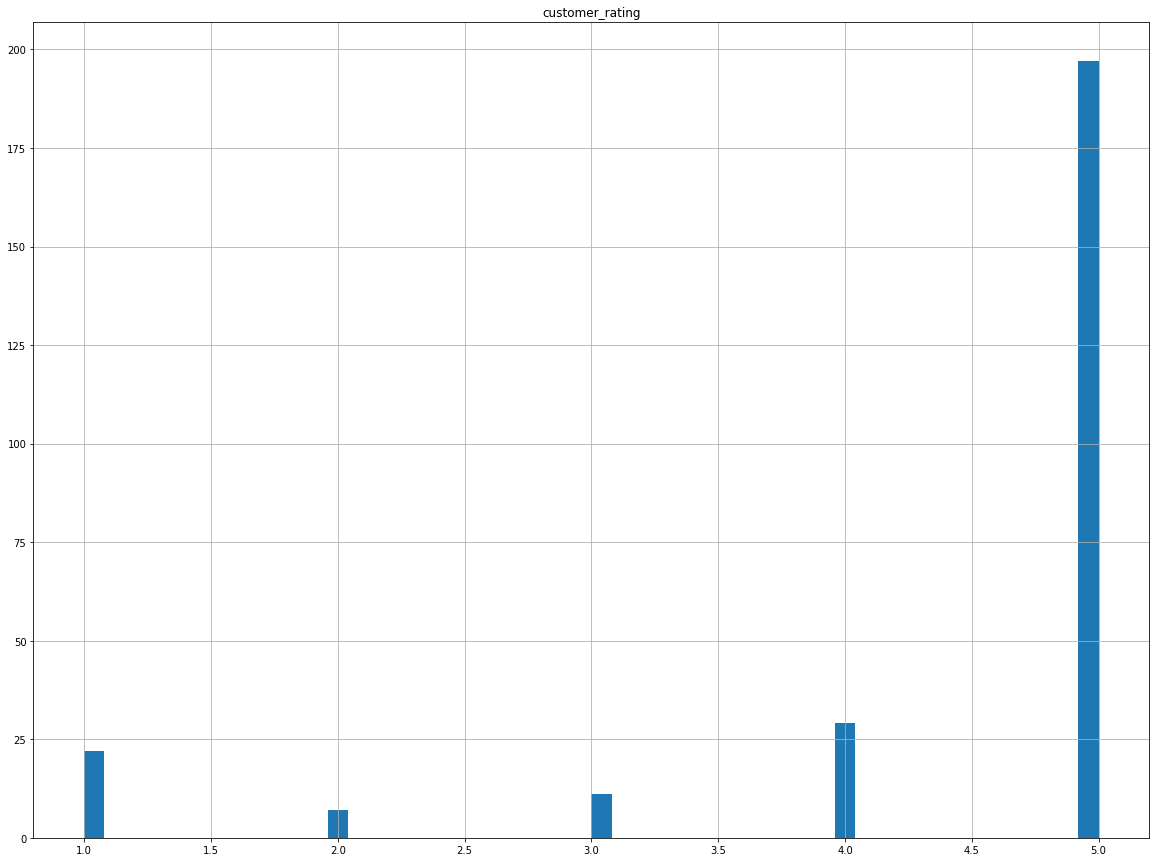

In [64]:
# Plotting the data
df.hist(bins=50, figsize=(20, 15))
plt.show()

Text(0, 0.5, 'number of reviews')

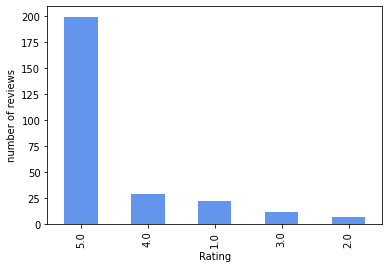

In [44]:
# Hist based on number of ratings of each review
df['customer_rating'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.xlabel('Rating')
plt.ylabel('number of reviews')

In [46]:
import pandas as pd
import ast
import time
import re
!pip install matplotlib-venn

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
print( len(df))
df = df[df['customer_review'].notnull()]
print( len(df))
df = df[df['customer_rating'].notnull()]
print( len(df))

266
266
266


In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['customer_review'], 
                                                   df['customer_rating'],
                                                   test_size=.2, random_state=1)

In [58]:
vect = CountVectorizer()

# tokenize train and test text data
X_train_dtm = vect.fit_transform(X_train)
print( "number words in training corpus:", len(vect.get_feature_names()))
X_test_dtm = vect.transform(X_test)

number words in training corpus: 1529


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [59]:
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

y_pred = nb.predict(X_test_dtm)

# calculate accuracy, precision, recall, and F-measure of class predictions
def eval_predictions(y_test, y_pred):
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('recall:', metrics.recall_score(y_test, y_pred, average='weighted'))
    print('F-measure:', metrics.f1_score(y_test, y_pred, average='weighted'))
eval_predictions(y_test, y_pred)

CPU times: user 2.77 ms, sys: 0 ns, total: 2.77 ms
Wall time: 2.93 ms
accuracy: 0.7037037037037037
precision: 0.49519890260631
recall: 0.7037037037037037
F-measure: 0.5813204508856683


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [28]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         6
         5.0       0.70      1.00      0.83        38

    accuracy                           0.70        54
   macro avg       0.14      0.20      0.17        54
weighted avg       0.50      0.70      0.58        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [72]:
data_f=df.sort_values('ProductId').drop_duplicates(subset=['UserId','ProfileName','Time','Summary','Text'],keep='first',inplace=False)
Final_Values=data_f[data_f['HelpfulnessDenominator']>=data_f['HelpfulnessNumerator']]
Final_Values

KeyError: ignored

In [71]:
fig = px.histogram(df, x="customer_rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()